<a href="https://colab.research.google.com/github/Segrey372017/CompetitiveReport/blob/main/consumer_poll_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data_link = 'https://github.com/Segrey372017/CompetitiveReport/blob/main/2022_%D0%9E%D0%BF%D1%80%D0%BE%D1%81_%D1%84%D0%B8%D0%B7%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%BB%D0%B8%D1%86_2021.xlsx?raw=true'

In [3]:
data = pd.read_excel(data_link)

In [4]:
data.head()

,Отметка времени,"В каком районе (городе, городском округе) вы проживаете?",Укажите Ваш пол,Каков Ваш социальный статус?,Укажите Ваш возраст,Есть ли у Вас дети?,Какое у Вас образование?,Каков примерно среднемесячный доход в расчете на одного члена вашей семьи?,Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дошкольного образования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг детского отдыха и оздоровления],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг среднего профессионального образования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дополнительного образования детей],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок медицинских услуг],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок социальных услуг],"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок теплоснабжения (производство тепловой энергии)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок выполнения работ по благоустройству городской среды],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг жилищно-коммунального хозяйства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок купли-продажи электрической энергии (мощности) на розничном рынке электрической энергии (мощности)],"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок производства электрической энергии (мощности) на розничном рынке электрической энергии (мощности), включая производство электрической энергии (мощности) в режиме когенерации.]",Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров автомобильным транспортом по муниципальным маршрутам регулярных перевозок],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров автомобильным транспортом по межмуниципальным маршрутам регулярных перевозок],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров и багажа легковым такси на территории субъекта Российской Федерации],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок дорожной деятельности (за исключением проектирования)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг связи],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок строительства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок архитектурно-строительного проектирования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок племенного животноводства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок семеноводства],Какое количество организаций представля

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737 entries, 0 to 1736
Columns: 377 entries, Отметка времени to С какими барьерами для пользования финансовыми услугами вы сталкивались?
dtypes: datetime64[ns](1), object(376)
memory usage: 5.0+ MB
None


In [6]:
for i in range(len(data.columns)):
    print(i,'.',data.columns[i])

0 . Отметка времени
1 . В каком районе (городе, городском округе) вы проживаете?
2 . Укажите Ваш пол
3 . Каков Ваш социальный статус?
4 . Укажите Ваш возраст
5 . Есть ли у Вас дети?
6 . Какое у Вас образование?
7 . Каков примерно среднемесячный доход в расчете на одного члена вашей семьи?
8 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дошкольного образования]
9 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг детского отдыха и оздоровления]
10 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг среднего профессионального образования]
11 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дополнительного образования детей]
12 . Какое количество организаций представляют следующие товары и услуги на рынках вашего района (го

In [7]:
from collections import Counter
print(Counter(data[data.columns[1]]))

Counter({'Родниковский муниципальный район': 158, 'Городской округ Кинешма': 152, 'Городской округ Иваново': 121, 'Тейковский муниципальный район': 110, 'Городской округ Тейково': 81, 'Верхнеландеховский муниципальный район': 73, 'Ивановский муниципальный район': 61, 'Городской округ Кохма': 61, 'Комсомольский муниципальный район': 60, 'Городской округ Шуя': 59, 'Городской округ Вичуга': 59, 'Лежневский муниципальный район': 57, 'Южский муниципальный район': 54, 'Вичугский муниципальный район': 53, 'Шуйский муниципальный район': 53, 'Заволжский муниципальный район': 52, 'Лухский муниципальный район': 51, 'Савинский муниципальный район': 50, 'Гаврилово-Посадский муниципальный район': 50, 'Пучежский муниципальный район': 50, 'Фурмановский муниципальный район': 50, 'Пестяковский муниципальный район': 50, 'Кинешемский муниципальный район': 49, 'Приволжский муниципальный район': 40, 'Палехский муниципальный район': 34, 'Ильинский муниципальный район': 26, 'Юрьевецкий муниципальный район': 2

In [8]:
kin_index = data.index[data[data.columns[1]].values=='Городской округ Кинешма']
kin_data = data.iloc[kin_index,:]
kin_data.head()

,Отметка времени,"В каком районе (городе, городском округе) вы проживаете?",Укажите Ваш пол,Каков Ваш социальный статус?,Укажите Ваш возраст,Есть ли у Вас дети?,Какое у Вас образование?,Каков примерно среднемесячный доход в расчете на одного члена вашей семьи?,Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дошкольного образования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг детского отдыха и оздоровления],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг среднего профессионального образования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дополнительного образования детей],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок медицинских услуг],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок социальных услуг],"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок теплоснабжения (производство тепловой энергии)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок выполнения работ по благоустройству городской среды],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг жилищно-коммунального хозяйства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок купли-продажи электрической энергии (мощности) на розничном рынке электрической энергии (мощности)],"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок производства электрической энергии (мощности) на розничном рынке электрической энергии (мощности), включая производство электрической энергии (мощности) в режиме когенерации.]",Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров автомобильным транспортом по муниципальным маршрутам регулярных перевозок],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров автомобильным транспортом по межмуниципальным маршрутам регулярных перевозок],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок оказания услуг по перевозке пассажиров и багажа легковым такси на территории субъекта Российской Федерации],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок дорожной деятельности (за исключением проектирования)],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг связи],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок строительства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок архитектурно-строительного проектирования],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок племенного животноводства],Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок семеноводства],Какое количество организаций представля

In [9]:
def make_hist(d_info):
    "Выодит гистограму по полученным данным"
    plt.figure(figsize= (8,6))
    sns.histplot(d_info)
    plt.xticks(rotation = 90)
    plt.ylabel('Число опрошенных')
    plt.show()
    return

In [10]:
def calc_percent(cnt, r = 2):
    """ Считает процентное соотношение числа опрошенных,всего опрошенных 100%
        r - окгугление до r знаков после запятой
    """
    s = sum(cnt.values())
    p_cnt = dict()

    for key in cnt.keys():
        p_cnt[key] = round(cnt[key] / s * 100, r)

    p_cnt['Всего'] = s
    return p_cnt

In [11]:
kin_data.shape

(152, 377)

In [12]:
# Пол опрошенных

gender = dict(Counter(kin_data.iloc[:,2]).most_common())
print(gender)
print(calc_percent(gender))

{'Мужской': 80, 'Женский': 72}
{'Мужской': 52.63, 'Женский': 47.37, 'Всего': 152}


In [13]:
# социальный статут опрошенных
work = dict(Counter(kin_data.iloc[:, 3]).most_common())
print(work)
print(calc_percent(work))

{'Учусь (студент)': 39, 'Пенсионер': 38, 'Работаю': 33, 'Без работы': 27, 'Домохозяйка': 15}
{'Учусь (студент)': 25.66, 'Пенсионер': 25.0, 'Работаю': 21.71, 'Без работы': 17.76, 'Домохозяйка': 9.87, 'Всего': 152}


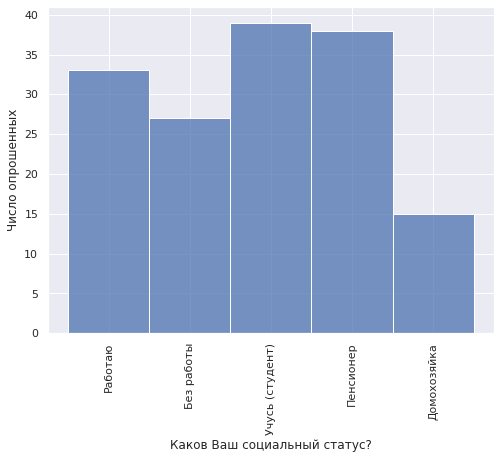

In [14]:
make_hist(kin_data.iloc[:, 3])

In [15]:
# возраст
age = dict(Counter(kin_data.iloc[:, 4]).most_common())
print(age)
print(calc_percent(age))

{'от 25 до 34 лет': 43, 'от 45 до 54 лет': 40, 'от 18 до 24 лет': 26, 'от 55 до 64 лет': 25, 'от 35 до 44 лет': 18}
{'от 25 до 34 лет': 28.29, 'от 45 до 54 лет': 26.32, 'от 18 до 24 лет': 17.11, 'от 55 до 64 лет': 16.45, 'от 35 до 44 лет': 11.84, 'Всего': 152}


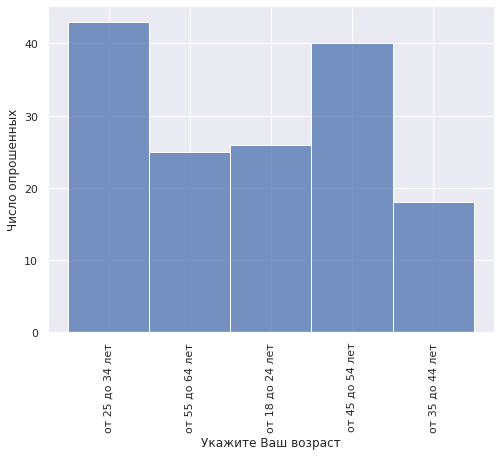

In [16]:
# возраст опрошенных
make_hist(kin_data.iloc[:, 4])

In [17]:
# детность
child = dict(Counter(kin_data.iloc[:, 5]).most_common())
print(child)
print(calc_percent(child))

{'нет': 92, '1 ребенок': 51, '2 детей': 9}
{'нет': 60.53, '1 ребенок': 33.55, '2 детей': 5.92, 'Всего': 152}


In [18]:
# образование
education = dict(Counter(kin_data.iloc[:, 6]).most_common())
print(education)
print(calc_percent(education))

{'Среднее профессиональное образование': 82, 'Высшее - специалитет, магистратура': 52, 'Высшее - бакалавриат': 18}
{'Среднее профессиональное образование': 53.95, 'Высшее - специалитет, магистратура': 34.21, 'Высшее - бакалавриат': 11.84, 'Всего': 152}


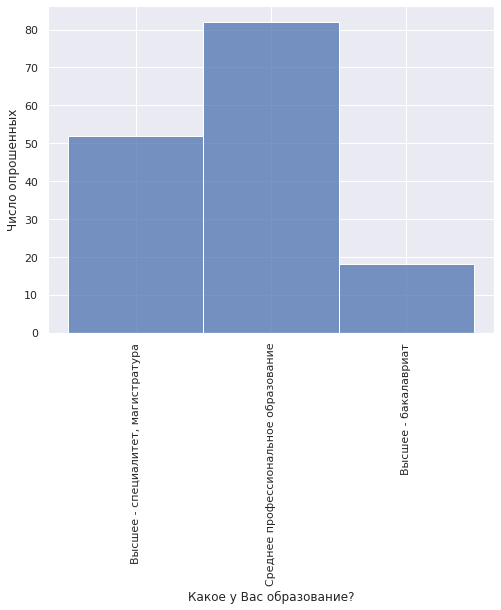

In [19]:
make_hist(kin_data.iloc[:, 6])

In [20]:
# уровень дохода
income = dict(Counter(kin_data.iloc[:, 7]).most_common())
print(income)
print(calc_percent(income))

{'От 10 до 20 тыс. рублей': 84, 'До 10 тыс. рублей': 36, 'От 20 до 30 тыс. рублей': 32}
{'От 10 до 20 тыс. рублей': 55.26, 'До 10 тыс. рублей': 23.68, 'От 20 до 30 тыс. рублей': 21.05, 'Всего': 152}


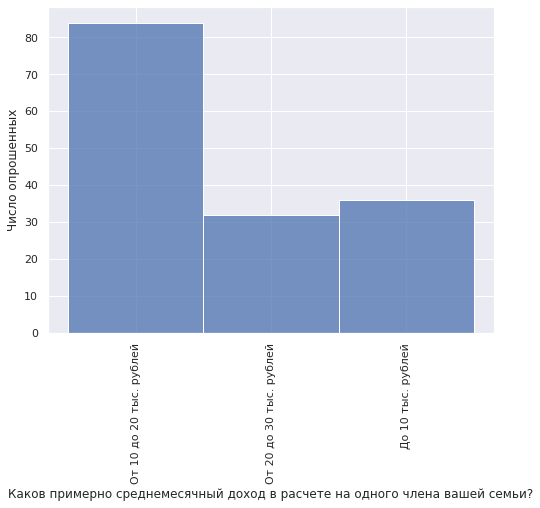

In [21]:
make_hist(kin_data.iloc[:, 7])

In [22]:
# Блок количество организаций действующих в различных сегментах рынка
from IPython.display import HTML, display
st = 8
end =39 

html_str = "<table> "
for i in range(st, end+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дошкольного образования],Достаточно,47,Мало,35,Избыточно (много),34,Нет совсем,26,Затрудняюсь ответить,10
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг детского отдыха и оздоровления],Достаточно,52,Мало,40,Нет совсем,28,Избыточно (много),19,Затрудняюсь ответить,13
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг среднего профессионального образования],Достаточно,55,Мало,45,Нет совсем,24,Избыточно (много),23,Затрудняюсь ответить,5
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг дополнительного образования детей],Мало,43,Достаточно,41,Нет совсем,37,Затрудняюсь ответить,16,Избыточно (много),15
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок медицинских услуг],Достаточно,39,Мало,37,Нет совсем,34,Избыточно (много),33,Затрудняюсь ответить,9
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок социальных услуг],Достаточно,45,Мало,44,Нет совсем,27,Избыточно (много),26,Затрудняюсь ответить,10
"Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Достаточно,49,Мало,38,Нет совсем,29,Избыточно (много),22,Затрудняюсь ответить,14
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок теплоснабжения (производство тепловой энергии)],Достаточно,52,Нет совсем,36,Мало,34,Избыточно (много),19,Затрудняюсь ответить,11
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок выполнения работ по благоустройству городской среды],Достаточно,54,Мало,34,Нет совсем,33,Избыточно (много),23,Затрудняюсь ответить,8
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг жилищно-коммунального хозяйства],Достаточно,54,Мало,42,Нет совсем,25,Избыточно (много),24,Затрудняюсь ответить,7
Какое количество организаций представляют следующие товары и услуги на рынках вашего района (города)? [Рынок услуг по сбору и транспортированию твердых коммунальных отходов (далее – ТКО)],Мало,50,Достаточно,47,Нет совсем,30,Избыточно (много),14,Затрудняюсь ответить,11


In [23]:
# Гистограммы
"""
for i in range(st, end+1):
    make_hist(kin_data.iloc[:, i])
"""

'\nfor i in range(st, end+1):\n    make_hist(kin_data.iloc[:, i])\n'

In [24]:
# удовлетворенность КАЧЕСТВОМ товаров услуг
st3 = 72
end3 =103 

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок ремонта автотранспортных средств],Скорее не удовлетворен,54,Скорее удовлетворен,50,Не удовлетворен,31,Удовлетворен,17
Насколько вы удовлетворены УРОВНЕМ ЦЕН следующих товаров и услуг на рынках вашего района (города) [Рынок нефтепродуктов],Скорее не удовлетворен,59,Скорее удовлетворен,41,Не удовлетворен,33,Удовлетворен,19
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дошкольного образования],Скорее удовлетворен,74,Скорее не удовлетворен,44,Удовлетворен,24,Не удовлетворен,10
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг детского отдыха и оздоровления],Скорее удовлетворен,75,Скорее не удовлетворен,43,Удовлетворен,27,Не удовлетворен,7
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг среднего профессионального образования],Скорее удовлетворен,73,Скорее не удовлетворен,43,Удовлетворен,28,Не удовлетворен,8
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дополнительного образования детей],Скорее удовлетворен,78,Скорее не удовлетворен,35,Удовлетворен,30,Не удовлетворен,9
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок медицинских услуг],Скорее удовлетворен,84,Скорее не удовлетворен,38,Удовлетворен,24,Не удовлетворен,6
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок социальных услуг],Скорее удовлетворен,82,Скорее не удовлетворен,39,Удовлетворен,21,Не удовлетворен,10
"Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Скорее удовлетворен,77,Скорее не удовлетворен,40,Удовлетворен,27,Не удовлетворен,8
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок теплоснабжения (производство тепловой энергии)],Скорее удовлетворен,63,Удовлетворен,43,Скорее не удовлетворен,36,Не удовлетворен,10
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок выполнения работ по благоустройству городской среды],Скорее удовлетворен,63,Скорее не удовлетворен,59,Удовлетворен,22,Не удовлетворен,8


In [25]:
# Удовлетворенность АССОРТИМЕНТОМ товаров услуг
st2 = 104
end2 =135

html_str = "<table> "
for i in range(st2, end2+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Сфера наружной рекламы],Скорее удовлетворен,68,Скорее не удовлетворен,52,Удовлетворен,20,Не удовлетворен,12
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок ремонта автотранспортных средств],Скорее удовлетворен,78,Скорее не удовлетворен,34,Удовлетворен,33,Не удовлетворен,7
Насколько вы удовлетворены КАЧЕСТВОМ следующих товаров и услуг на рынках вашего района (города) [Рынок нефтепродуктов],Скорее удовлетворен,68,Скорее не удовлетворен,54,Удовлетворен,19,Не удовлетворен,11
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дошкольного образования],Скорее не удовлетворен,52,Скорее удовлетворен,50,Удовлетворен,27,Не удовлетворен,23
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг детского отдыха и оздоровления],Скорее удовлетворен,56,Скорее не удовлетворен,48,Удовлетворен,30,Не удовлетворен,18
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг среднего профессионального образования],Скорее не удовлетворен,53,Скорее удовлетворен,49,Удовлетворен,33,Не удовлетворен,17
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг дополнительного образования детей],Скорее удовлетворен,60,Скорее не удовлетворен,53,Не удовлетворен,20,Удовлетворен,19
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок медицинских услуг],Скорее не удовлетворен,55,Скорее удовлетворен,53,Удовлетворен,23,Не удовлетворен,21
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок социальных услуг],Скорее не удовлетворен,57,Скорее удовлетворен,54,Удовлетворен,31,Не удовлетворен,10
"Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок услуг розничной торговли лекарственными препаратами, медицинскими изделиями и сопутствующими товарами]",Скорее удовлетворен,62,Скорее не удовлетворен,42,Удовлетворен,28,Не удовлетворен,20
Насколько вы удовлетворены АССОРТИМЕНТОМ следующих товаров и услуг на рынках вашего района (города) [Рынок теплоснабжения (производство тепловой энергии)],Скорее не удовлетворен,54,Скорее удовлетворен,48,Удовлетворен,38,Не удовлетворен,12


In [26]:
# На какие товары и (или) услуги, по вашему мнению, цены в ивановской области  выше по сравнению с другими регионами
price = dict(Counter(kin_data.iloc[:, 136]).most_common())
print(price)
print(calc_percent(price))

{'Скорее не удовлетворен': 63, 'Скорее удовлетворен': 46, 'Удовлетворен': 24, 'Не удовлетворен': 19}
{'Скорее не удовлетворен': 41.45, 'Скорее удовлетворен': 30.26, 'Удовлетворен': 15.79, 'Не удовлетворен': 12.5, 'Всего': 152}


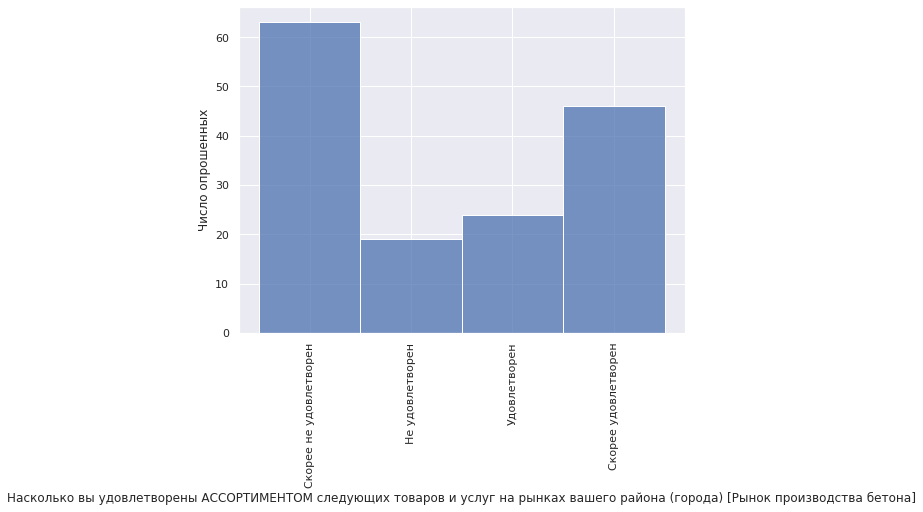

In [27]:
make_hist(kin_data.iloc[:, 136])

In [28]:
# На каких рынках товаров и услуг, на ваш взгляд, слабо развита конкуренция, что негативно сказывается на качестве товара и ценах?
markets = dict(Counter(kin_data.iloc[:, 137]).most_common())
print(markets)
print(calc_percent(markets))

{'Скорее удовлетворен': 56, 'Скорее не удовлетворен': 52, 'Удовлетворен': 26, 'Не удовлетворен': 18}
{'Скорее удовлетворен': 36.84, 'Скорее не удовлетворен': 34.21, 'Удовлетворен': 17.11, 'Не удовлетворен': 11.84, 'Всего': 152}


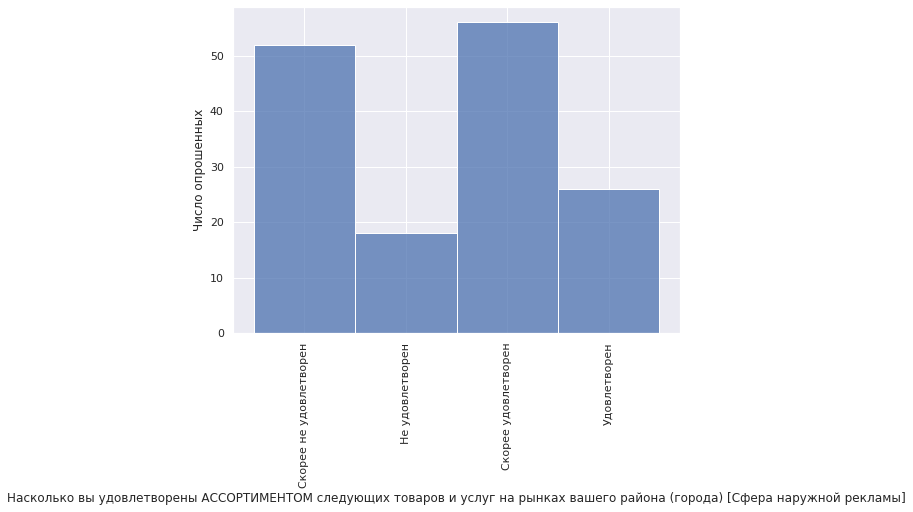

In [29]:
make_hist(kin_data.iloc[:, 137])

In [30]:
# Изменение  КОЛЛИЧЕСТВА товаров услуг
st3 = 138
end3 =169

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [31]:
# Изменение КАЧЕСТВА товаров услуг
st3 = 170
end3 = 201

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Рынок производства кирпича]",Не изменилось,68,Увеличилось,51,Снизилось,25,Затрудняюсь ответить,8
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Рынок производства бетона]",Не изменилось,66,Увеличилось,45,Снизилось,27,Затрудняюсь ответить,14
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Сфера наружной рекламы]",Не изменилось,78,Увеличилось,39,Снизилось,25,Затрудняюсь ответить,10
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Рынок ремонта автотранспортных средств]",Не изменилось,64,Увеличилось,49,Снизилось,31,Затрудняюсь ответить,8
"Как, по вашему мнению, изменилось КОЛИЧЕСТВО доступных вам продавцов товаров и услуг на рынках ивановской области в течение последних 3 лет? [Рынок нефтепродуктов]",Не изменилось,78,Увеличилось,45,Снизилось,22,Затрудняюсь ответить,7
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дошкольного образования]",Не изменилось,71,Снизилось,60,Увеличилось,17,Затрудняюсь ответить,4
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги детского отдыха и оздоровления]",Не изменилось,78,Снизилось,47,Увеличилось,25,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги среднего профессионального образования]",Не изменилось,83,Снизилось,51,Увеличилось,15,Затрудняюсь ответить,3
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дополнительного образования детей]",Не изменилось,82,Снизилось,51,Увеличилось,17,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Медицинские услуги]",Не изменилось,73,Снизилось,47,Увеличилось,28,Затрудняюсь ответить,4
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Социальные услуги]",Не изменилось,71,Снизилось,64,Увеличилось,15,Затрудняюсь ответить,2


In [32]:
# Изменение УровняЦЕН товаров услуг
st3 = 202
end3 = 233

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок обработки древесины и производства изделий из дерева]",Не изменилось,75,Снизилось,50,Увеличилось,25,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Кирпич]",Не изменилось,66,Снизилось,62,Увеличилось,20,Затрудняюсь ответить,4
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Бетон]",Не изменилось,71,Снизилось,61,Увеличилось,18,Затрудняюсь ответить,2
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги наружной рекламы]",Не изменилось,72,Снизилось,60,Увеличилось,14,Затрудняюсь ответить,6
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок ремонта автотранспортных средств]",Не изменилось,66,Снизилось,62,Увеличилось,19,Затрудняюсь ответить,5
"Укажите, как, по вашему мнению, изменилось КАЧЕСТВО следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок нефтепродуктов]",Снизилось,66,Не изменилось,60,Увеличилось,20,Затрудняюсь ответить,6
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дошкольного образования]",Увеличился,55,Не изменился,46,Затрудняюсь ответить,29,Снизился,22
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги детского отдыха и оздоровления]",Увеличился,56,Не изменился,54,Затрудняюсь ответить,28,Снизился,14
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги среднего профессионального образования]",Увеличился,59,Не изменился,56,Затрудняюсь ответить,20,Снизился,17
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дополнительного образования детей]",Увеличился,60,Не изменился,56,Снизился,20,Затрудняюсь ответить,16
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Медицинские услуги]",Увеличился,54,Не изменился,44,Затрудняюсь ответить,32,Снизился,22


In [33]:
# Изменение АССОРТИМЕНТА товаров услуг
st3 = 234
end3 = 265

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок легкой промышленности]",Увеличился,51,Не изменился,51,Затрудняюсь ответить,28,Снизился,22
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок обработки древесины и производства изделий из дерева]",Увеличился,64,Не изменился,50,Затрудняюсь ответить,20,Снизился,18
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок производства кирпича]",Не изменился,51,Увеличился,49,Затрудняюсь ответить,32,Снизился,20
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок производства бетона]",Увеличился,53,Не изменился,52,Затрудняюсь ответить,29,Снизился,18
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Сфера наружной рекламы]",Увеличился,58,Не изменился,47,Затрудняюсь ответить,27,Снизился,20
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок ремонта автотранспортных средств]",Увеличился,56,Не изменился,56,Затрудняюсь ответить,27,Снизился,13
"Укажите, как, по вашему мнению, изменился УРОВЕНЬ ЦЕН следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок нефтепродуктов]",Увеличился,58,Не изменился,51,Затрудняюсь ответить,25,Снизился,18
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дошкольного образования]",Увеличился,58,Не изменился,48,Затрудняюсь ответить,30,Снизился,16
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги детского отдыха и оздоровления]",Не изменился,56,Увеличился,53,Затрудняюсь ответить,23,Снизился,20
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги среднего профессионального образования]",Увеличился,56,Не изменился,42,Затрудняюсь ответить,34,Снизился,20
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Услуги дополнительного образования детей]",Не изменился,61,Увеличился,45,Затрудняюсь ответить,27,Снизился,19


In [34]:
# Качество официальной информации товаров услуг
st3 = 266
end3 = 268

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок добычи общераспространенных полезных ископаемых на участках недр местного значения]",Не изменился,54,Увеличился,42,Затрудняюсь ответить,37,Снизился,19
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок легкой промышленности]",Увеличился,52,Не изменился,52,Затрудняюсь ответить,26,Снизился,22
"Укажите, как, по вашему мнению, изменился АССОРТИМЕНТ следующих товаров и услуг на рынках в вашем районе (городе) в течение последних 3 лет [Рынок обработки древесины и производства изделий из дерева]",Не изменился,53,Увеличился,48,Затрудняюсь ответить,27,Снизился,24


In [35]:
# Качество услуг ЕСТЕСТВЕННЫХ МОНОПОЛИЙ
st3 = 269
end3 = 280

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [36]:
# С какими проблемами Вы столкнулись при взаимодействии с субъектами естественных монополий?
monopoly = dict(Counter(kin_data.iloc[:, 281]).most_common())
print(monopoly)
print(calc_percent(monopoly))

{'неудовлетворительное': 72, 'Удовлетворительное': 43, 'затрудняюсь ответить': 27, 'Хорошее': 10}
{'неудовлетворительное': 47.37, 'Удовлетворительное': 28.29, 'затрудняюсь ответить': 17.76, 'Хорошее': 6.58, 'Всего': 152}


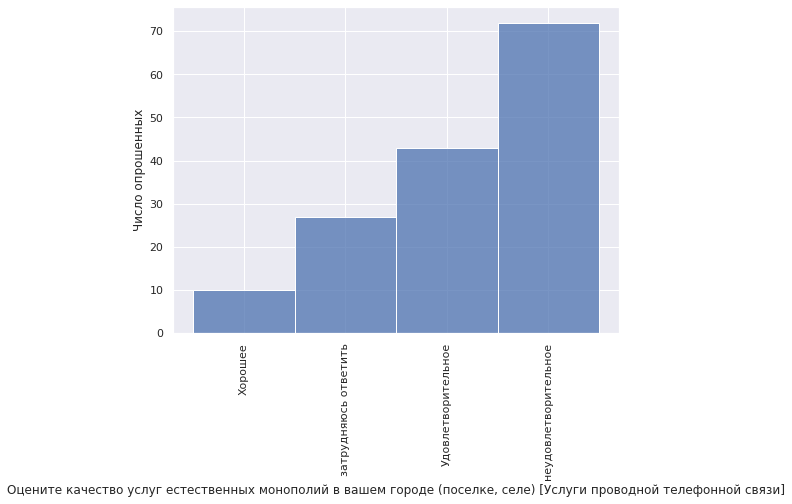

In [37]:
make_hist(kin_data.iloc[:, 281])

In [38]:
# Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта ....
st3 = 282
end3 = 289

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [39]:
# Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг?
st3 = 290
end3 = 298

html_str = "<table> "
for i in range(st3, end3+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Официальная информация, размещенная на официальном сайте уполномоченного органа в информационно-телекоммуникационной сети ""Интернет""]",Доверяю больше всего,79,Предпочитаю пользоваться,57,Затрудняюсь ответить,16
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Официальная информация, размещенная на интернет-портале об инвестиционной деятельности в субъекте Российской Федерации]",Доверяю больше всего,74,Предпочитаю пользоваться,63,Затрудняюсь ответить,15
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Официальная информация, размещенная на сайте Федеральной антимонопольной службы]",Доверяю больше всего,85,Предпочитаю пользоваться,51,Затрудняюсь ответить,16
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Информация, размещенная на официальных сайтах других исполнительных органов государственной власти субъекта Российской Федерации и муниципальных образований органов местного самоуправления в информационно-телекоммуникационной сети ""Интернет""]",Доверяю больше всего,74,Предпочитаю пользоваться,67,Затрудняюсь ответить,11
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Телевидение]",Доверяю больше всего,71,Предпочитаю пользоваться,66,Затрудняюсь ответить,15
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Печатные средства массовой информации]",Предпочитаю пользоваться,72,Доверяю больше всего,67,Затрудняюсь ответить,13
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Радио]",Предпочитаю пользоваться,71,Доверяю больше всего,69,Затрудняюсь ответить,12
"Укажите, какими источниками информации о состоянии конкурентной среды на рынках товаров, работ и услуг субъекта Российской Федерации и деятельности по содействию развитию конкуренции Вы предпочитаете пользоваться и доверяете больше всего? [Специальные блоги, порталы и прочие электронные ресурсы]",Предпочитаю пользоваться,74,Доверяю больше всего,66,Затрудняюсь ответить,12
Обращались ли вы за последние три года за защитой своих прав как потребитель из-за некачественных товаров и услуг? [Общественная организация по защите прав потребителей],Обращался - безрезультатно,80,"Обращался, мне помогли",42,Не обращался,30


<h2> Финансовые услуги</h2> 

In [40]:
# Как часто вы пользуетесь услугами финансовых организаций?
fin_serv = dict(Counter(kin_data.iloc[:, 299]).most_common())
print(fin_serv)
print(calc_percent(fin_serv))

{'Обращался - безрезультатно': 75, 'Обращался, мне помогли': 42, 'Не обращался': 35}
{'Обращался - безрезультатно': 49.34, 'Обращался, мне помогли': 27.63, 'Не обращался': 23.03, 'Всего': 152}


In [41]:
# Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев?
st4 = 300
end4 = 307

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [42]:
# Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев?
fin_prod = dict(Counter(kin_data.iloc[:, 309]).most_common())
print(fin_prod)
print(calc_percent(fin_prod))

{'Не использовался за последние 12 месяцев': 81, 'Не имеется сейчас, но использовался за последние 12 месяцев': 65, 'Имеется сейчас': 6}
{'Не использовался за последние 12 месяцев': 53.29, 'Не имеется сейчас, но использовался за последние 12 месяцев': 42.76, 'Имеется сейчас': 3.95, 'Всего': 152}


In [43]:
#  Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? 
st4 = 311
end4 = 314

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Индивидуальный инвестиционный счет],"Не имеется сейчас, но использовался за последние 12 месяцев",82,Не использовался за последние 12 месяцев,65,Имеется сейчас,5
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Инвестиционное страхование жизни],Не использовался за последние 12 месяцев,84,"Не имеется сейчас, но использовался за последние 12 месяцев",64,Имеется сейчас,4
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Брокерский счет],"Не имеется сейчас, но использовался за последние 12 месяцев",74,Не использовался за последние 12 месяцев,70,Имеется сейчас,8
Какими из перечисленных финансовых продуктов (услуг) Вы пользовались за последние 12 месяцев? [Вложение средств в паевой инвестиционный фонд],"Не имеется сейчас, но использовался за последние 12 месяцев",77,Не использовался за последние 12 месяцев,69,Имеется сейчас,6


In [44]:
# Пользовались ли Вы за последние 12 месяцев текущим счетом
current = dict(Counter(kin_data.iloc[:, 316]).most_common())
print(current)
print(calc_percent(current))

{'Иной кредит в банке, не являющийся онлайн-кредитом': 87, 'Онлайн-кредит в банке (договор заключен с использованием информационно-телекоммуникационной сети "Интернет", сумма кредита предоставлена получателю финансовой услуги в безналичной форме)': 35, 'Использование кредитного лимита по кредитной карте': 28, nan: 2}
{'Иной кредит в банке, не являющийся онлайн-кредитом': 57.24, 'Онлайн-кредит в банке (договор заключен с использованием информационно-телекоммуникационной сети "Интернет", сумма кредита предоставлена получателю финансовой услуги в безналичной форме)': 23.03, 'Использование кредитного лимита по кредитной карте': 18.42, nan: 1.32, 'Всего': 152}


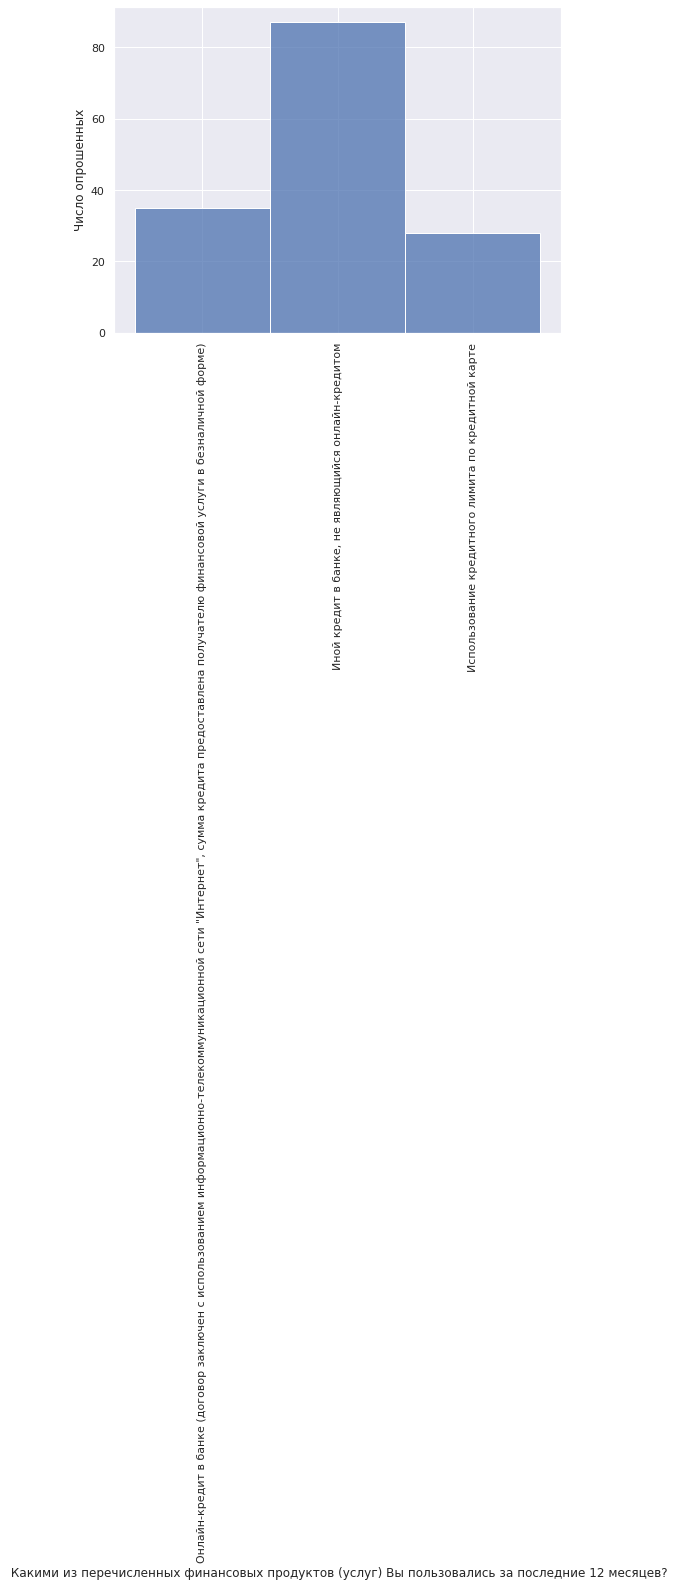

In [45]:
make_hist(kin_data.iloc[:, 316])

In [46]:
# Пользовались ли Вы следующими типами дистанционного доступа к банковскому счету
st4 = 317
end4 = 320

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

"Если Вы не пользовались за последние 12 месяцев ни одним из перечисленных в предыдущем вопросе продуктов, отметьте высказывания, которые описывают причину отсутствия у Вас этих продуктов?",nan,150,Нет необходимости в заемных средствах,1,Не люблю кредиты/займы/не хочу жить в долг,1
"Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? [Зарплатная карта (банковская карта, предназначенная для выплаты сотруднику заработной платы и других денежных начислений (премий, командировочных, материальной помощи и т.д.) организацией, заключившей с банком договор на обслуживание в рамках зарплатного проекта)]","Не имеется сейчас, но использовался за последние 12 месяцев",75,Не использовался за последние 12 месяцев,66,Имеется сейчас,11
Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? [Расчетная (дебетовая) карта для получения пенсий и иных социальных выплат],Не использовался за последние 12 месяцев,73,"Не имеется сейчас, но использовался за последние 12 месяцев",70,Имеется сейчас,9
"Какими из перечисленных платежных карт Вы пользовались за последние 12 месяцев? [Другая расчетная (дебетовая) карта, кроме зарплатной карты и (или) карты для получения пенсий и иных социальных выплат]","Не имеется сейчас, но использовался за последние 12 месяцев",73,Не использовался за последние 12 месяцев,70,Имеется сейчас,9


In [47]:
# Какими из перечисленных страховых продуктов (услуг) Вы пользовались за последние 12 месяцев?
st4 = 322
end4 = 324

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [48]:
# Насколько Вы удовлетворены работой/сервисом следующих финансовых организаций при оформлении
st4 = 326
end4 = 333

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [49]:
# Насколько Вы доверяете следующим финансовым организациям?
st4 = 334
end4 = 341

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [50]:
#  Если говорить о Вашем населенном пункте, насколько Вы удовлетворены...?
st4 = 342
end4 = 354

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [51]:
# Какие каналы обслуживания есть практически везде в Вашем населенном пункте, а каких не хватает?
st4 = 355
end4 = 360

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [52]:
# Какими каналами Вы можете воспользоваться быстро, не тратя много времени на доступ к ним или на ожидание,
st4 = 361
end4 = 366

html_str = "<table> "
for i in range(st4, end4+1):
    html_str += f"<tr> <td> {kin_data.columns[i]} </td>"
    ans = dict(Counter(kin_data.iloc[:, i]).most_common())
    for key in ans.keys():
        html_str += f"<td> {key} </td>  <td> {ans[key]} </td>"
    html_str += f"</tr>"

html_str +='</table>'
display(HTML(html_str))
#print(html_str)

In [53]:
# Можете ли вы пользоваться финансовыми услугами дистанционно (с помощью персонального компьютера или мобильных устройств)?
access = dict(Counter(kin_data.iloc[:, 367]).most_common())
print(access)
print(calc_percent(access))

{'4 доступно': 82, '3 достаточно доступно': 40, '5 - Легко доступно': 23, '2 плохо доступно': 6, '1 - Практически НЕ доступно': 1}
{'4 доступно': 53.95, '3 достаточно доступно': 26.32, '5 - Легко доступно': 15.13, '2 плохо доступно': 3.95, '1 - Практически НЕ доступно': 0.66, 'Всего': 152}


In [54]:
# Оцените собственные знания и навыки в сфере финансовых продуктов и услуг, где 1 – нет знаний и навыков; 5 – отличные 

ability = dict(Counter(kin_data.iloc[:, 368]).most_common())
print(ability)
print(calc_percent(ability))

{'4 нет больших затрат времени': 66, '3 трачу среднее количество времени': 42, '5 - Могу воспользоваться быстро': 35, '2 трачу достаточно большое количество времени': 9}
{'4 нет больших затрат времени': 43.42, '3 трачу среднее количество времени': 27.63, '5 - Могу воспользоваться быстро': 23.03, '2 трачу достаточно большое количество времени': 5.92, 'Всего': 152}


In [55]:
# С какими барьерами для пользования финансовыми услугами вы сталкивались?
bar= dict(Counter(kin_data.iloc[:, 369]).most_common())
print(bar)
print(calc_percent(bar))

{'4 нет больших затрат времени': 65, '3 трачу среднее количество времени': 41, '5 - Могу воспользоваться быстро': 31, '2 трачу достаточно большое количество времени': 15}
{'4 нет больших затрат времени': 42.76, '3 трачу среднее количество времени': 26.97, '5 - Могу воспользоваться быстро': 20.39, '2 трачу достаточно большое количество времени': 9.87, 'Всего': 152}


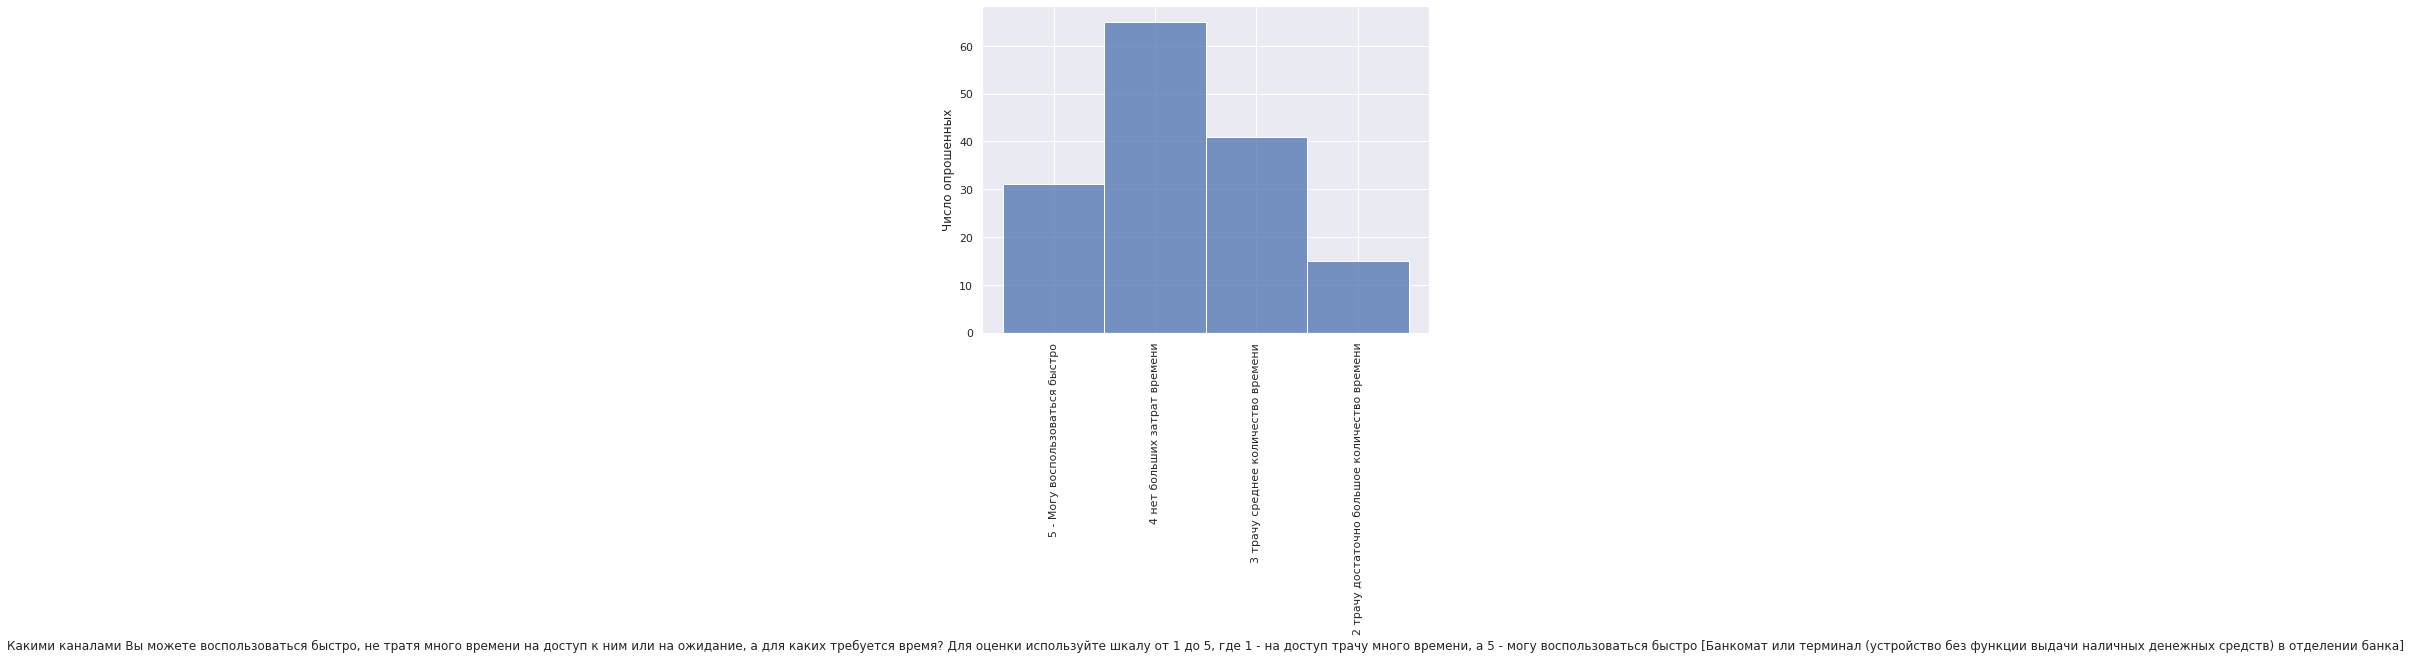

In [56]:
make_hist(kin_data.iloc[:, 369])